### Load and Clean Data

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

# Load data
df = pd.read_csv(r'../data/data_jobs.csv')

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) # Convert job_posted_date to datetime type
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list) # Convert skill_list from string to list type
df['degree_required'] = ~df['job_no_degree_mention'] # Creating new column to indicate if a degree is required in a job listing

### Filter for Data Analyst Jobs in Australia

In [79]:
df_DA_aus = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Australia')]
print(df_DA_aus['job_title_short'].value_counts())
print(df_DA_aus['job_country'].value_counts())
print(df_DA_aus.info())

job_title_short
Data Analyst    1658
Name: count, dtype: int64
job_country
Australia    1658
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 1658 entries, 1374 to 785244
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   job_title_short        1658 non-null   object        
 1   job_title              1658 non-null   object        
 2   job_location           1658 non-null   object        
 3   job_via                1658 non-null   object        
 4   job_schedule_type      1634 non-null   object        
 5   job_work_from_home     1658 non-null   bool          
 6   search_location        1658 non-null   object        
 7   job_posted_date        1658 non-null   datetime64[ns]
 8   job_no_degree_mention  1658 non-null   bool          
 9   job_health_insurance   1658 non-null   bool          
 10  job_country            1658 non-null   object        
 11  sa

### Top 10 Jobs

In [80]:
# Creating dataframe of 10 most frequent job locations for plotting
df_plot = df_DA_aus['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Australia,1048
Anywhere,153
"Sydney NSW, Australia",127
"Melbourne VIC, Australia",107
"Brisbane QLD, Australia",43
"Canberra ACT, Australia",35
"Perth WA, Australia",32
"Adelaide SA, Australia",9
"Victoria, Australia",9


Text(0.5, 0, 'Number of Job Postings')

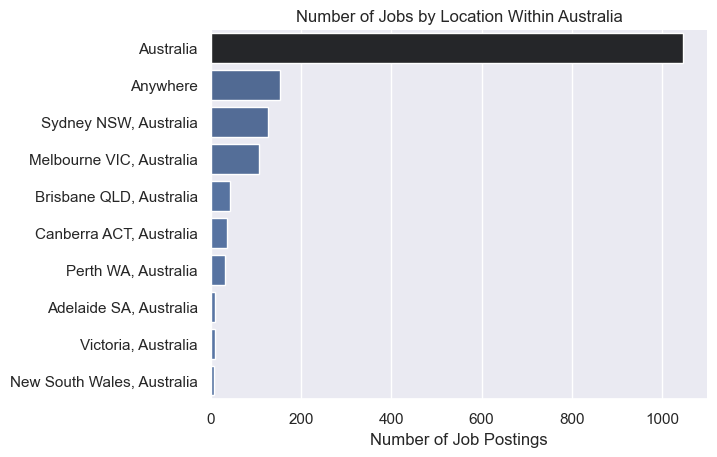

In [37]:
# Creating horizontal bar plot
sns.set_theme(style='darkgrid')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs by Location Within Australia')
plt.ylabel('')
plt.xlabel('Number of Job Postings')

### Plotting Work from Home Status, Degree Requirement, and Health Insurance Offering Proportions

In [97]:
# Check counts of True and False for each column to be plotted
print(
df_DA_aus['job_work_from_home'].value_counts(),
df_DA_aus['degree_required'].value_counts(),
df_DA_aus['job_health_insurance'].value_counts()
)

job_work_from_home
False    1505
True      153
Name: count, dtype: int64 degree_required
False    1016
True      642
Name: count, dtype: int64 job_health_insurance
False    1658
Name: count, dtype: int64


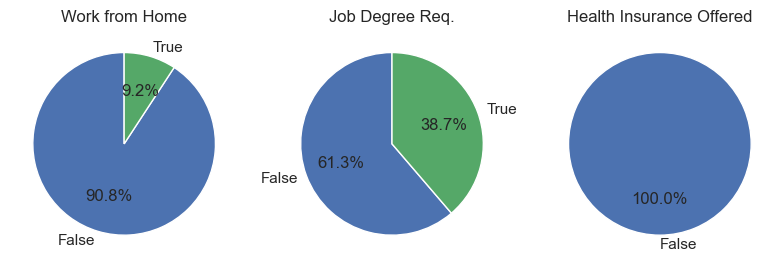

In [98]:
plt.style.use('seaborn-v0_8-deep')

fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    # 'job_no_degree_mention': 'Job Degree Req.',
    'degree_required': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_aus[column].value_counts().sort_index()
    ax[i].pie(df_DA_aus[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=counts.index.astype(str))
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

### Number of Job Postings by Company Name

Text(0.5, 0, 'Number of Job Postings')

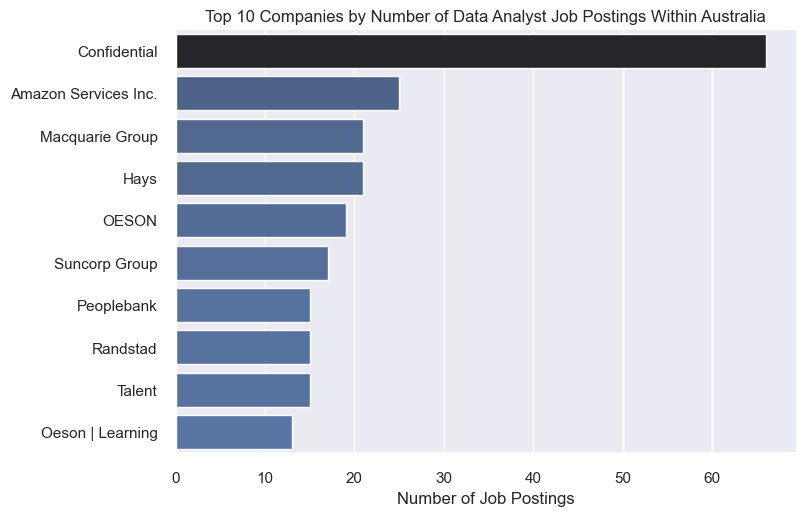

In [84]:
# Creating dataframe of top 10 companies in Australia
df_plot = df_DA_aus['company_name'].value_counts().head(10).to_frame()


# Creating horizontal bar plot
sns.set_theme(style='darkgrid')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 Companies by Number of Data Analyst Job Postings Within Australia')
plt.ylabel('')
plt.xlabel('Number of Job Postings')

### Number of Job Postings Over Time

In [85]:
df_DA_aus['job_posted_date'].dt.date.value_counts().index.min()

datetime.date(2023, 1, 1)

In [ ]:
df_DA_aus

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
